Normalized distance between the two sounds: 107622.4006729126


(-0.5, 430.5)

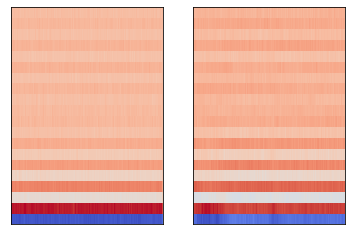

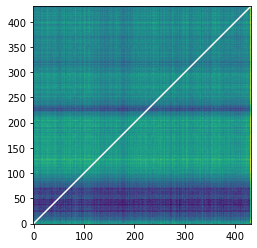

In [18]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
y1, sr1 = librosa.load(r'D:\Ботать\Работа\dcase\dev_data\dcase\fan\test\normal_id_00_00000000.wav')
y2, sr2 = librosa.load(r'D:\Ботать\Работа\dcase\dev_data\dcase\fan\test\anomaly_id_02_00000059.wav')


plt.subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
display.specshow(mfcc1)
plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
display.specshow(mfcc2)
from dtw import dtw
from numpy.linalg import norm
dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print ('Normalized distance between the two sounds:', dist)
plt.figure()
plt.imshow(cost.T, origin='lower',  interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))

In [50]:
from config import TEST_WAV_DIR
import pathlib
from dtw import dtw
from numpy.linalg import norm
import numpy as np
from tqdm import tqdm
from sklearn.metrics import roc_auc_score,f1_score
from saparator import Buono_Brutto_Cattivo
directory = TEST_WAV_DIR
files = pathlib.Path(directory)
files = files.glob('*.wav')
files=list(files)

y1, sr1 = librosa.load(r'D:\Ботать\Работа\dcase\dev_data\dcase\fan\test\normal_id_00_00000000.wav')
y2, sr2 = librosa.load(r'D:\Ботать\Работа\dcase\dev_data\dcase\fan\test\anomaly_id_00_00000070.wav')
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)
dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print(dist)

131253.707321167


In [ ]:
size=len(files)
y=np.zeros((size,1))
y_test=np.zeros((size,1))
for num,file in tqdm(enumerate(files),total=size):
    y2, sr2 = librosa.load(file)
    mfcc2 = librosa.feature.mfcc(y2, sr2)
    dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
    if dist>100000:
        y_test[num] = 0
    else:
        y_test[num] = 1
    name=file.stem.split('_')[0]
    if name=='normal':
        y[num]=1
    else:
        y[num]=0

In [24]:
print(roc_auc_score(y,y_test))
print(f1_score(y,y_test))





1.0
0.34774523477452346
